# IPL Dataset Combined

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Dataset

In [2]:
df_matches = pd.read_csv('../data/matches.csv')
df_deliveries = pd.read_csv('../data/deliveries.csv')

# Analyze Train Dataset

In [3]:
df_matches.head(2)
df_deliveries.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


## Rename `id` of matches.csv to `match_id` to make it easy to combine the two files

In [4]:
df_matches = df_matches.rename({'id':'match_id'}, axis='columns')

In [5]:
df_matches.shape
df_deliveries.shape

(636, 18)

(150460, 21)

## Combine the two files to create a single file

In [167]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [168]:
# Replace team names with abbreviations to make it easy to view in plots
df_deliveries.replace(
    ['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Daredevils',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'
    ],
    ['SRH','RPS','KKR','KXIP','RCB','MI','DD','GL','CSK','RR','DC','PW','KTK','RPS'],
    inplace=True
)
df_matches.replace(
    ['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Daredevils',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'
    ],
    ['SRH','RPS','KKR','KXIP','RCB','MI','DD','GL','CSK','RR','DC','PW','KTK','RPS'],
    inplace=True
)

In [169]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## Checking for Null Values

player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

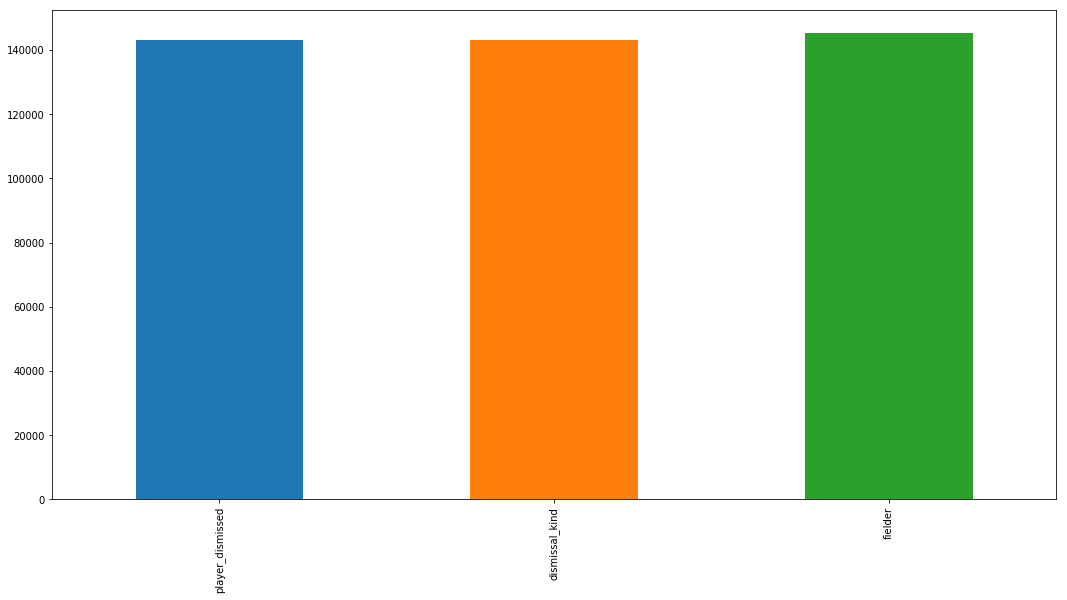

In [170]:
empty_columns = df_deliveries.columns[df_deliveries.isna().any()].tolist()
df_deliveries[empty_columns].isnull().sum()
df_deliveries[empty_columns].isnull().sum().plot(kind='bar', figsize=(18, 9))

## Preparing data for predicting winner using both dataset

In [171]:
df = df_deliveries.drop(['player_dismissed', 'dismissal_kind', 'fielder'], axis = 1)

In [172]:
empty_columns = df.columns[df.isna().any()].tolist()
df.isna().any()

match_id         False
inning           False
batting_team     False
bowling_team     False
over             False
ball             False
batsman          False
non_striker      False
bowler           False
is_super_over    False
wide_runs        False
bye_runs         False
legbye_runs      False
noball_runs      False
penalty_runs     False
batsman_runs     False
extra_runs       False
total_runs       False
dtype: bool

#  Next Try Important features in Matches df from deliveries

In [261]:
df_runs = df[['match_id','inning', 'batting_team', 'total_runs']]
df_runs.head()

,match_id,inning,batting_team,total_runs
0,1,1,SRH,0
1,1,1,SRH,0
2,1,1,SRH,4
3,1,1,SRH,0
4,1,1,SRH,2


In [262]:
df_d = df_runs.groupby(['match_id', 'batting_team'])[['total_runs']].sum()
x = pd.DataFrame({
    'total_runs': df_runs.groupby(['match_id', 'batting_team'])['total_runs'].sum()
}).reset_index()
x

,match_id,batting_team,total_runs
0,1,RCB,172
1,1,SRH,207
2,2,MI,184
3,2,RPS,187
4,3,GL,183
5,3,KKR,184
6,4,KXIP,164
7,4,RPS,163
8,5,DD,142
9,5,RCB,157


In [263]:
x.rename({'id':'match_id'}, axis='columns')

,match_id,batting_team,total_runs
0,1,RCB,172
1,1,SRH,207
2,2,MI,184
3,2,RPS,187
4,3,GL,183
5,3,KKR,184
6,4,KXIP,164
7,4,RPS,163
8,5,DD,142
9,5,RCB,157


In [281]:
df_total = pd.merge(df_matches, x, on=['match_id'])
df_total.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,batting_team,total_runs
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,RCB,172
1,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,SRH,207
2,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,MI,184
3,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,RPS,187
4,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,GL,183


In [282]:
df_total.isna().any()
# dx = df_total[df_total['city', 'umpire1', 'umpire2', 'umpire3', 'winner', 'player_of_match'].notnull()]
df_total.info()

match_id           False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
batting_team       False
total_runs         False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 0 to 1269
Data columns (total 20 columns):
match_id           1270 non-null int64
season             1270 non-null int64
city               1256 non-null object
date               1270 non-null object
team1              1270 non-null object
team2              1270 non-null object
toss_winner        1270 non-null object
toss_decision      1270 non-null object
result             1270 non-null object
dl_applied         1270 non-null int64
winner             1266 non-null object
win_by_runs        1270 non-null int64
win_by_wickets     1270 non-null int64
player_of_match    1266 non-null object
venue              1270 non-null object
umpire1            1268 non-null object
umpire2            1268 non-null object
umpire3            0 non-null float64
batting_team       1270 non-null object
total_runs         1270 non-null int64
dtypes: float64(1), int64(6), object(13)
memory usage: 208.4+ KB


In [289]:
temp_df = df_total.drop(['dl_applied','city','result', 'player_of_match', 'umpire1', 'umpire2','umpire3', 'match_id'], axis = 1)

In [290]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 0 to 1269
Data columns (total 12 columns):
season            1270 non-null int64
date              1270 non-null object
team1             1270 non-null object
team2             1270 non-null object
toss_winner       1270 non-null object
toss_decision     1270 non-null object
winner            1266 non-null object
win_by_runs       1270 non-null int64
win_by_wickets    1270 non-null int64
venue             1270 non-null object
batting_team      1270 non-null object
total_runs        1270 non-null int64
dtypes: int64(4), object(8)
memory usage: 129.0+ KB


In [294]:
xss = temp_df()

,season,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,batting_team,total_runs


In [291]:
le = LabelEncoder()

In [292]:
df_encoded = temp_df.apply(le.fit_transform)
df_encoded.head()

TypeError: ("'<' not supported between instances of 'float' and 'str'", 'occurred at index winner')

In [288]:
X = df_encoded.drop(['winner'], axis=1)
y = df_encoded['winner']
X.head()
y.head()
X.shape
y.shape

ValueError: labels ['winner'] not contained in axis

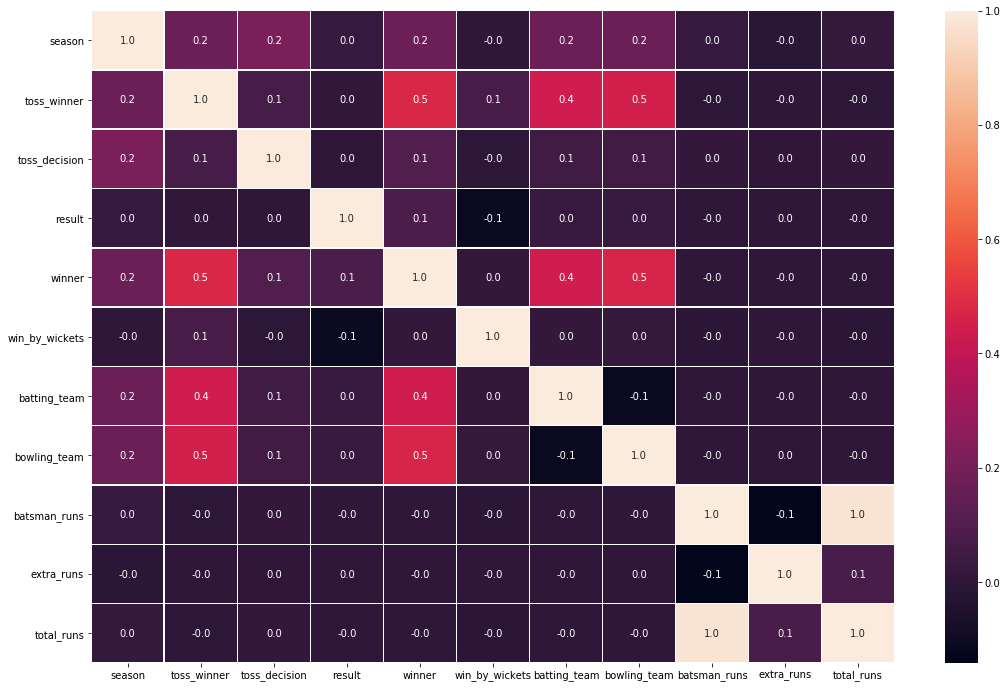

In [161]:
f,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_encoded.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Train Test Split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, stratify=y)

print(X_train.shape, X_test.shape)

(75069, 10) (75070, 10)


In [163]:
X_ohe = pd.get_dummies(X, columns=X.columns, prefix = X.columns)
X_ohe.head()
X_ohe.shape

,season_0,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,toss_winner_0,toss_winner_1,toss_winner_2,toss_winner_3,toss_winner_4,toss_winner_5,toss_winner_6,toss_winner_7,toss_winner_8,toss_winner_9,toss_winner_10,toss_winner_11,toss_winner_12,toss_decision_0,toss_decision_1,result_0,result_1,win_by_wickets_0,win_by_wickets_1,win_by_wickets_2,win_by_wickets_3,win_by_wickets_4,win_by_wickets_5,win_by_wickets_6,win_by_wickets_7,win_by_wickets_8,win_by_wickets_9,win_by_wickets_10,batting_team_0,batting_team_1,batting_team_2,batting_team_3,batting_team_4,batting_team_5,batting_team_6,batting_team_7,batting_team_8,batting_team_9,batting_team_10,batting_team_11,batting_team_12,bowling_team_0,bowling_team_1,bowling_team_2,bowling_team_3,bowling_team_4,bowling_team_5,bowling_team_6,bowling_team_7,bowling_team_8,bowling_team_9,bowling_team_10,bowling_team_11,bowling_team_12,batsman_runs_0,batsman_runs_1,batsman_runs_2,batsman_runs_3,batsman_runs_4,batsman_runs_5,batsman_runs_6,extra_runs_0,extra_runs_1,extra_runs_2,extra_runs_3,extra_runs_4,extra_runs_5,extra_runs_6,total_runs_0,total_runs_1,total_runs_2,total_runs_3,total_runs_4,total_runs_5,total_runs_6,total_runs_7
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


(150139, 86)

In [164]:
models = []

models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier()))
models.append(("XGBoost Classifier:", XGBClassifier(n_estimators = 200)))
# models.append(("GradientBoostingClassifier:", GradientBoostingClassifier(n_estimators = 200)))

print('Models appended...')

Models appended...


In [165]:
def run_models(X, y):
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, X, y.values.ravel(), cv = 4, scoring = "accuracy", n_jobs = -1, verbose = 1)
        names.append(name)
        results.append(cv_result)
        print('Progress', name, cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

# Function to run the Models with Cross Validation

In [166]:
run_models(X, y)

Progress Decision Tree Classifier: [ 0.53553732  0.6551669   0.63521074  0.53021583]


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


Progress Random Forest Classifier: [ 0.54139805  0.67709194  0.73189641  0.43160139]


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished


Progress XGBoost Classifier: [ 0.54915019  0.55510563  0.61317739  0.42872369]
Decision Tree Classifier: 58.9032698442
Random Forest Classifier: 59.5496946352
XGBoost Classifier: 53.6539224284


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.1min finished


# New Try Do Correlation Check and select features

In [31]:
df_2 = df_m.drop(['date'], axis = 1)
df_2.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [32]:
dfnew = df_2.dropna()
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 16 columns):
id                 625 non-null int64
season             625 non-null int64
city               625 non-null object
team1              625 non-null object
team2              625 non-null object
toss_winner        625 non-null object
toss_decision      625 non-null object
result             625 non-null object
dl_applied         625 non-null int64
winner             625 non-null object
win_by_runs        625 non-null int64
win_by_wickets     625 non-null int64
player_of_match    625 non-null object
venue              625 non-null object
umpire1            625 non-null object
umpire2            625 non-null object
dtypes: int64(5), object(11)
memory usage: 83.0+ KB


## Apply LabelEncoding

In [33]:
le2 = LabelEncoder()
df_new = dfnew.apply(le2.fit_transform)
df_new.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,0,9,13,12,9,9,1,0,0,12,35,0,199,22,5,23
1,1,9,24,7,10,10,1,0,0,10,0,7,176,15,1,33
2,2,9,26,3,4,4,1,0,0,4,0,10,30,24,27,11
3,3,9,14,10,6,6,1,0,0,6,0,6,56,10,2,9
5,4,9,13,3,12,12,1,0,0,12,0,9,154,22,0,23


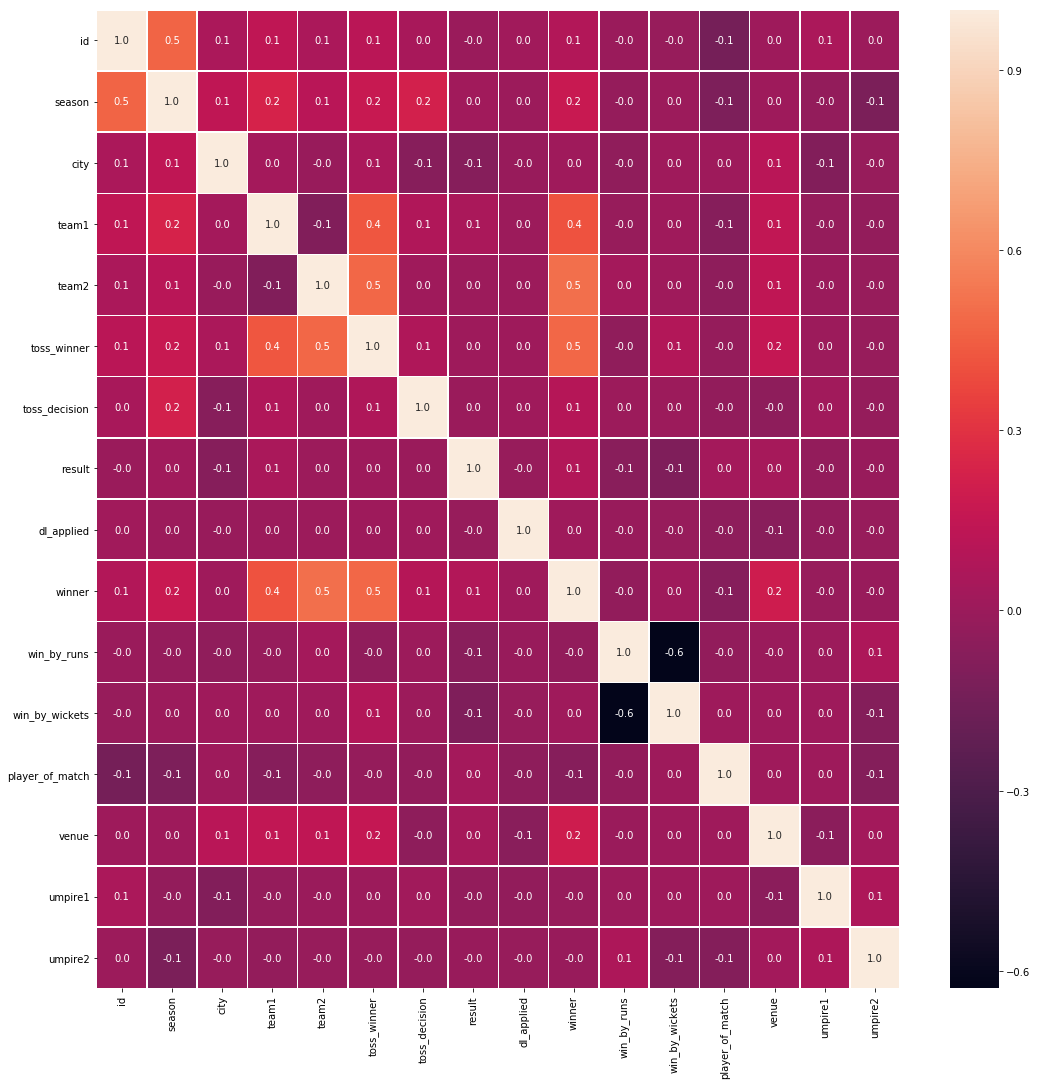

In [34]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

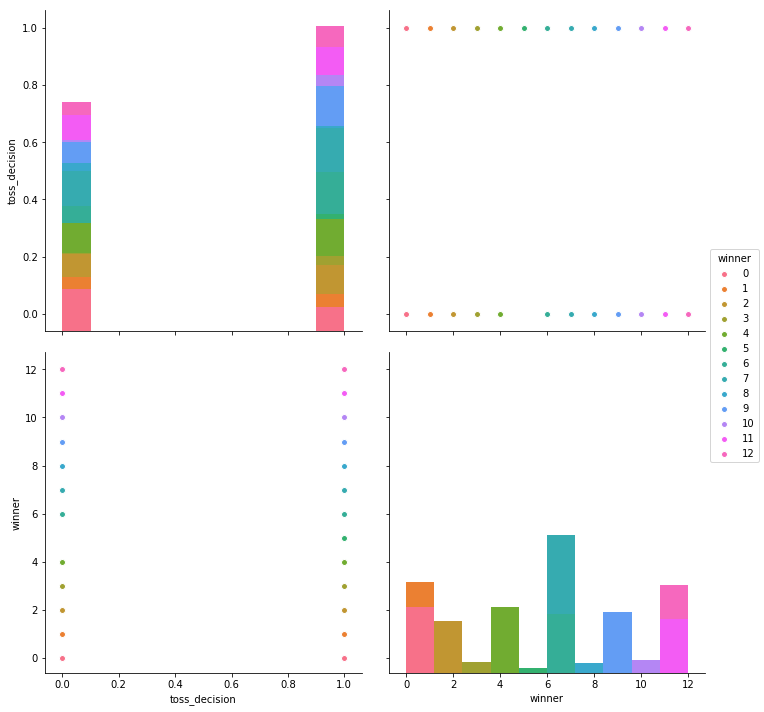

In [35]:
sns.pairplot(df_new, hue="winner", vars=["toss_decision", "winner"], size = 5)

In [36]:
X_new = df_new.drop(['winner', 'dl_applied', 'result', 'umpire1', 'umpire2', 'id'], axis = 1)
y_new = df_new['winner']

In [37]:
X_new_ohe = pd.get_dummies(X_new, columns=X_new.columns, prefix = X_new.columns)
X_new_ohe.head()

,season_0,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,...,venue_24,venue_25,venue_26,venue_27,venue_28,venue_29,venue_30,venue_31,venue_32,venue_33
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
run_models(X_new_ohe, y_new)

Logistic Regression: 63.2796429754
K-Nearest Neighbour: 67.8888977755
Decision Tree Classifier: 80.5390116721
Random Forest Classifier: 74.3688654945
MLP: 64.0685368654
GradientBoostingClassifier: 96.849658697
SVC: 15.0515158266


Best Results till now

- Logistic Regression: 63.2796429754
- K-Nearest Neighbour: 67.8888977755
- Decision Tree Classifier: 81.8971784286
- Random Forest Classifier: 78.5324998099
- MLP: 66.5652409868
- GradientBoostingClassifier: **96.849658697**
- SVC: 15.0515158266

# Combining Matches and Deliveries to find something useful

In [40]:
df_m.head()
df_d.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df_combined = df